In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import warnings
warnings.filterwarnings('ignore')

In [37]:
dataframe = pd.read_csv("house_price.csv", sep=";")

In [38]:
dataframe.head(10)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
5,6,85.0,14115,0.0,732,0,64,796,796,566,...,1362,480,40,30,0,320,0,0,700,143000
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,...,1694,636,255,57,0,0,0,0,0,307000
7,8,NaN,10382,240.0,859,32,216,1107,1107,983,...,2090,484,235,204,228,0,0,0,350,200000
8,9,51.0,6120,0.0,0,0,952,952,1022,752,...,1774,468,90,0,205,0,0,0,0,129900
9,10,50.0,7420,0.0,851,0,140,991,1077,0,...,1077,205,0,4,0,0,0,0,0,118000


In [39]:
dataframe.shape

(1460, 21)

In [40]:
dataframe.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

In [42]:
dataframe.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [43]:
dataframe[pd.isna(dataframe['MasVnrArea'])]

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
234,235,NaN,7851,NaN,625,0,235,860,860,1100,...,1960,440,288,48,0,0,0,0,0,216500
529,530,NaN,32668,NaN,1219,0,816,2035,2515,0,...,2515,484,0,0,200,0,0,0,0,200624
650,651,65.0,8125,NaN,0,0,813,813,822,843,...,1665,562,0,0,0,0,0,0,0,205950
936,937,67.0,10083,NaN,833,0,343,1176,1200,0,...,1200,555,0,41,0,0,0,0,0,184900
973,974,95.0,11639,NaN,0,0,1428,1428,1428,0,...,1428,480,0,120,0,0,0,0,0,182000
977,978,35.0,4274,NaN,1106,0,135,1241,1241,0,...,1241,569,0,116,0,0,0,0,0,199900
1243,1244,107.0,13891,NaN,1386,0,690,2076,2076,0,...,2076,850,216,229,0,0,0,0,0,465000
1278,1279,75.0,9473,NaN,804,0,324,1128,1128,903,...,2031,577,0,211,0,0,0,0,0,237000


In [44]:
dataframe[pd.isna(dataframe['LotFrontage'])]

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
7,8,NaN,10382,240.0,859,32,216,1107,1107,983,...,2090,484,235,204,228,0,0,0,350,200000
12,13,NaN,12968,0.0,737,0,175,912,912,0,...,912,352,140,0,0,0,176,0,0,144000
14,15,NaN,10920,212.0,733,0,520,1253,1253,0,...,1253,352,0,213,176,0,0,0,0,157000
16,17,NaN,11241,180.0,578,0,426,1004,1004,0,...,1004,480,0,0,0,0,0,0,700,149000
24,25,NaN,8246,0.0,188,668,204,1060,1060,0,...,1060,270,406,90,0,0,0,0,0,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,NaN,12546,310.0,678,0,762,1440,1440,0,...,1440,467,0,0,99,0,0,0,0,182900
1431,1432,NaN,4928,0.0,958,0,0,958,958,0,...,958,440,0,60,0,0,0,0,0,143750
1441,1442,NaN,4426,147.0,697,0,151,848,848,0,...,848,420,149,0,0,0,0,0,0,149300
1443,1444,NaN,8854,0.0,0,0,952,952,952,0,...,952,192,0,98,0,0,40,0,0,121000


In [45]:
dataframe.corr()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


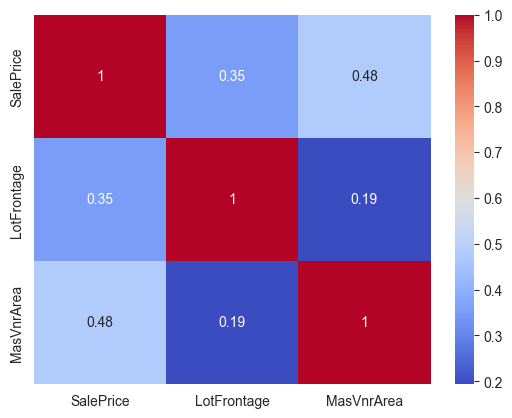

In [46]:
# Calcular la matriz de correlación
a = pd.DataFrame()
a['SalePrice'] = dataframe['SalePrice']
a['LotFrontage'] = dataframe['LotFrontage']
a['MasVnrArea'] = dataframe['MasVnrArea']
correlation_matrix = a.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

In [47]:
media = np.nanmean(dataframe['LotFrontage'])
dataframe['LotFrontage'].fillna(media, inplace=True)
dataframe[pd.isna(dataframe['LotFrontage'])]

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice


In [48]:
dataframe.head(10)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.000000,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.000000,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.000000,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.000000,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.000000,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
5,6,85.000000,14115,0.0,732,0,64,796,796,566,...,1362,480,40,30,0,320,0,0,700,143000
6,7,75.000000,10084,186.0,1369,0,317,1686,1694,0,...,1694,636,255,57,0,0,0,0,0,307000
7,8,70.049958,10382,240.0,859,32,216,1107,1107,983,...,2090,484,235,204,228,0,0,0,350,200000
8,9,51.000000,6120,0.0,0,0,952,952,1022,752,...,1774,468,90,0,205,0,0,0,0,129900
9,10,50.000000,7420,0.0,851,0,140,991,1077,0,...,1077,205,0,4,0,0,0,0,0,118000


In [49]:
media = np.nanmean(dataframe['MasVnrArea'])
dataframe['MasVnrArea'].fillna(media, inplace=True)

In [50]:
x = dataframe.drop('SalePrice', axis=1)
y = dataframe['SalePrice']

In [51]:
reducer = umap.UMAP()
reducer.fit(x)
x_umap = reducer.transform(x)
x_umap.shape

(1460, 2)

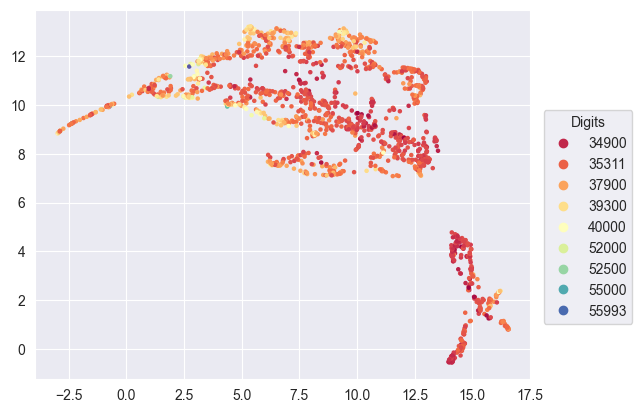

In [52]:
fig, ax = plt.subplots(
    figsize=None
)

color = y.astype(int)

scatter = ax.scatter(
    x_umap[:, 0], x_umap[:, 1],
    c=color, cmap="Spectral",
    s=5
)

# Get unique digits from the target variable
unique_digits = np.unique(y)

# Create a legend with labels for each digit
legend_labels = [str(digit) for digit in unique_digits]
ax.legend(
    handles=scatter.legend_elements()[0],
    labels=legend_labels,
    title="Digits",
    loc=(1.025, 0.15),
)